In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler



In [501]:
df=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis (1).csv')

In [504]:
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [506]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [507]:
new_pv=df['Monthly Premium Auto']*df['Months Since Policy Inception']-df['Total Claim Amount']     
df['new_pv']=new_pv

In [508]:
df=df.drop(columns=['State','Response','Effective To Date','Gender','Location Code','Months Since Last Claim','Months Since Policy Inception','Policy','Sales Channel','Total Claim Amount','Vehicle Size','Monthly Premium Auto','Marital Status'])

In [509]:
df=df.drop(columns=['Customer'])

In [510]:
df[:1]

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Income,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Vehicle Class,new_pv
0,2763.519279,Basic,Bachelor,Employed,56274,0,1,Corporate Auto,Offer1,Two-Door Car,-39.811147


In [512]:
df.describe()

,Customer Lifetime Value,Income,Number of Open Complaints,Number of Policies,new_pv
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,0.384388,2.966170,4065.906607
std,6870.967608,30379.904734,0.910384,2.390182,3182.473551
min,1898.007675,0.000000,0.000000,1.000000,-1581.000000
25%,3994.251794,0.000000,0.000000,1.000000,1663.200000
50%,5780.182197,33889.500000,0.000000,2.000000,3668.709439
75%,8962.167041,62320.000000,0.000000,4.000000,5764.577001
max,83325.381190,99981.000000,5.000000,9.000000,25866.400000


In [522]:
num_df=df.select_dtypes(include=['int64','float64'])[:1]

In [523]:
df=pd.get_dummies(df)

In [524]:
df[:1]

,Customer Lifetime Value,Income,Number of Open Complaints,Number of Policies,new_pv,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,...,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,56274,0,1,-39.811147,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [525]:
from sklearn.model_selection import train_test_split

In [526]:
from sklearn import preprocessing

In [527]:
standardized_X = preprocessing.scale(df)

In [528]:
#X_train

In [529]:
X=df.iloc[:,1:]

In [530]:
y=df.iloc[:,0]

In [531]:
from sklearn.model_selection import KFold

In [533]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## XGBoost Model

In [534]:
from xgboost import XGBRegressor

In [535]:
model = XGBRegressor()
model.fit(X_train, y_train,verbose=1)

C:\Users\LENOVO\Anaconda3new\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [536]:
model1 = XGBRegressor()
model1.fit(X_train,y_train,eval_metric='rmse',verbose=1)

[22:40:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [537]:
x1=pd.DataFrame(X)
y1=pd.DataFrame(y)

In [539]:
import xgboost as xgb

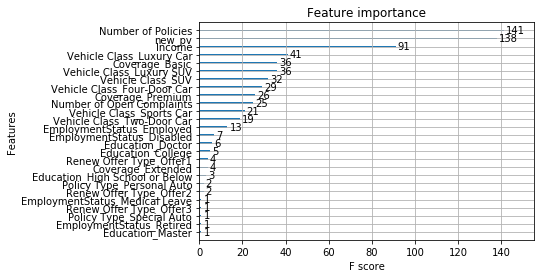

In [540]:

xgb.plot_importance(model1)
plt.show()

In [403]:
y_pred_test = model1.predict(X_test)

In [404]:
y_pred_train=model1.predict(X_train)

In [406]:
from sklearn import metrics

In [407]:
metrics.r2_score(y_test,y_pred_test)

0.6503276641044977

In [550]:
kf = KFold(n_splits = 5, shuffle = True)
model = XGBRegressor()
scores = []
for i in range(5):
    result = next(kf.split(x1), None)
    x_train = x1.iloc[result[0]]
    x_test = x1.iloc[result[1]]
    y_train = y1.iloc[result[0]]
    y_test = y1.iloc[result[1]]
    model = model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

[22:57:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Scores from each Iteration:  [0.6838997401614175, 0.6628549098413541, 0.6993362809720194, 0.7098465423674969, 0.6627535545092408]
Average K-Fold Score : 0.6837382055703057


## Clustering to identify no. of splits

In [465]:
import scipy.cluster.hierarchy as sch



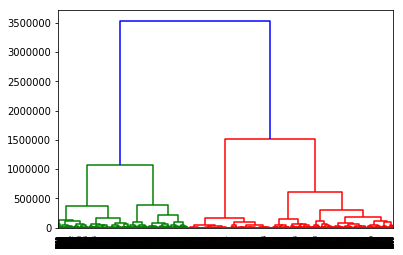

In [469]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [470]:
from sklearn.cluster import AgglomerativeClustering

In [471]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [472]:
y_hc=hc.fit_predict(X)

## Linear Regression Model

In [541]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (X1_train,(1/y1_train))
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 1.11845790e-10 -6.47056306e-07  3.66852175e-09  6.20876189e-10
   8.14365833e-07  1.83583529e-06 -2.65020112e-06 -6.27265576e-08
  -8.40648839e-06  1.00210053e-05  1.74036521e-06 -3.29215556e-06
  -9.92100216e-07 -2.08102974e-06  6.92486899e-08  7.26741774e-07
   2.27713949e-06  8.61551777e-07  2.50749186e-07 -1.11230096e-06
   9.90473434e-07  5.15910524e-07 -2.58156270e-06  1.07517874e-06
  -8.76277605e-07 -2.19417816e-06  8.15534668e-06 -1.94780562e-06
  -4.72788013e-07 -2.66429728e-06]]
Intercept:  [0.00018772]


In [542]:
from sklearn.metrics import r2_score
predictions = regr.predict(X1_test)


Text(0, 0.5, 'Predicted Y')

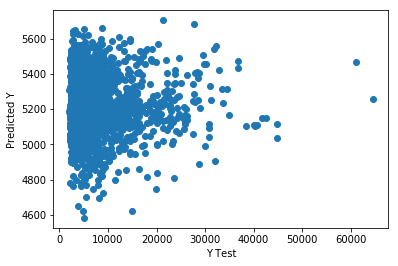

In [543]:
plt.scatter(y1_test,(1/predictions))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [544]:
from sklearn import metrics
metrics.r2_score(y_test,(1/predictions))

-0.1768976702757703

0

0

In [263]:
=

C:\Users\LENOVO\Anaconda3new\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\LENOVO\Anaconda3new\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_norm = scaler.fit_transform(df)

In [150]:
y_norm=scaler.fit_transform(np.asarray(a).reshape(-1,1))

In [151]:
from xgboost import XGBRegressor

In [152]:
kf = KFold(n_splits = 5, shuffle = True)
model = XGBRegressor()

In [153]:
from sklearn.model_selection import KFold 

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x_norm,y_norm,test_size = 0.2)